In [1]:
%load_ext autoreload
%autoreload 2
from Libs.load_data import ClassificationDataLoader,DataLoader, get_dataset_split
from Libs import flares_plot as fplt
from Libs.threshold import get_labels_physic, get_labels_KDE, get_labels_quantile, get_labels_quantile_on_run
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import backend as K

2023-03-08 23:20:05.087808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 23:20:05.237731: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-08 23:20:05.237788: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-08 23:20:06.210962: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_loader = ClassificationDataLoader(run=1000, N=1000, s=0.5, t=0.01, d=0.2, m=1)
params = data_loader.get_params()
params

{'run': 1000,
 'sigma': [0.5],
 'theta': [0.01],
 'mu': [1],
 'delta': [0.2],
 'N': 1000}

In [3]:
Xs, best_labels = data_loader.load_data()

Loading Data


100%|██████████| 1000/1000 [00:02<00:00, 357.69it/s]


Loading Labels
Labels Loaded


In [4]:
bindexes = data_loader.get_standard_indexes()
df_train, df_val, df_test = get_dataset_split(Xs, best_labels, bindexes, window_size=100, overlap_size=0, label_treshold=1,
                                      split_on_run=True, shuffle_run=False, shuffle_window=False,
                                      test_size = 0.2, val_size=0.2, get_validation=True, random_state=42)
df_train

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,future_flare
0,1.000000,0.975000,1.032464,0.971177,1.008763,1.613887,1.541340,1.160297,0.909633,1.139886,...,2.123586,2.019029,1.606649,1.292181,1.749603,1.310395,1.189947,0.725631,0.545688,0
1,0.453473,0.424261,0.428987,0.476285,0.340001,0.331761,0.347253,0.272749,0.260545,0.240849,...,0.064207,0.050255,0.070111,0.085234,0.112227,0.092467,0.116607,0.109768,0.122677,0
2,0.092407,0.082127,0.117068,0.122153,0.128558,0.118923,0.094720,0.093159,0.091833,0.106344,...,0.562908,0.538757,0.633308,0.436399,0.324115,0.307335,0.370301,0.536084,0.492093,0
3,0.412387,0.427911,0.355963,0.394572,0.400088,0.505247,0.391656,0.335066,0.410583,0.539532,...,0.132009,0.138302,0.189172,0.171830,0.152864,0.101511,0.095359,0.050325,0.052333,0
4,0.061759,0.085453,0.078217,0.073920,0.101169,0.091641,0.094517,0.112165,0.113400,0.113808,...,0.111100,0.132652,0.125772,0.138899,0.174086,0.277742,0.253462,0.186646,0.107814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.095377,0.090921,0.091640,0.097088,0.125360,0.149449,0.179462,0.287212,0.261941,0.247967,...,0.627059,0.847414,0.678120,0.514339,0.786728,0.817797,0.782243,0.601992,0.900493,1
5396,0.709127,0.999271,1.305236,1.377765,1.752058,1.147707,0.715787,0.624256,0.548760,0.578098,...,0.031888,0.049433,0.043005,0.057172,0.056504,0.064256,0.063427,0.076043,0.076313,0
5397,0.079158,0.078221,0.087566,0.100598,0.083446,0.100857,0.107979,0.091897,0.051895,0.078073,...,0.089393,0.087776,0.105324,0.060409,0.057263,0.036604,0.037404,0.051258,0.054644,0
5398,0.076156,0.061581,0.049085,0.064282,0.064938,0.093030,0.107892,0.143807,0.131975,0.135244,...,0.046431,0.039724,0.032600,0.034823,0.028246,0.023636,0.029547,0.033676,0.042461,0


In [5]:
df_val

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,future_flare
0,1.000000,0.975000,0.896512,0.627729,0.732925,0.864451,0.843442,0.502488,0.394139,0.369285,...,0.439198,0.432127,0.299483,0.304749,0.345031,0.299415,0.266869,0.298639,0.285796,0
1,0.294540,0.259462,0.274690,0.266270,0.312541,0.234787,0.195377,0.142764,0.140138,0.134963,...,0.064553,0.067199,0.065381,0.067009,0.100656,0.087210,0.120246,0.108691,0.108463,0
2,0.082102,0.107480,0.102269,0.088598,0.085053,0.100951,0.102865,0.067374,0.074504,0.060597,...,0.158186,0.176068,0.170004,0.126503,0.109118,0.095567,0.086418,0.109810,0.130419,0
3,0.157388,0.163676,0.125466,0.104832,0.079762,0.064634,0.049290,0.062345,0.079063,0.066147,...,0.143199,0.155031,0.195843,0.144517,0.165961,0.208958,0.225952,0.223278,0.169415,0
4,0.154111,0.207580,0.145699,0.146272,0.170166,0.204834,0.163758,0.131690,0.142858,0.148192,...,0.106981,0.080429,0.096699,0.197067,0.208429,0.206311,0.160764,0.135589,0.093305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2.276165,2.273163,3.445708,2.804499,2.501356,2.662270,2.120348,1.923899,1.507809,1.605193,...,1.341494,1.743847,2.123701,2.609974,3.303776,3.886069,4.124162,2.939625,3.024121,1
1796,2.289392,2.383255,2.179564,2.150547,2.106985,1.769324,2.339703,1.525309,1.555113,1.747341,...,0.944560,0.872189,0.722752,0.546804,0.549555,0.340817,0.484956,0.616227,0.509583,0
1797,0.375892,0.351719,0.436015,0.299574,0.292184,0.364591,0.273742,0.326247,0.289213,0.276709,...,0.067388,0.049032,0.041878,0.033055,0.028980,0.030147,0.041982,0.043392,0.035610,0
1798,0.041258,0.052810,0.073231,0.093953,0.095252,0.105889,0.080934,0.066274,0.090782,0.084213,...,0.458876,0.403183,0.616437,0.599753,0.393404,0.383602,0.406379,0.341388,0.288893,0


In [6]:
df_test

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,future_flare
0,1.000000,0.975000,1.007897,0.738563,0.715067,0.595839,0.577329,0.467114,0.338982,0.444925,...,0.030012,0.038611,0.029635,0.041943,0.070393,0.082154,0.074672,0.087071,0.080648,0
1,0.096240,0.107337,0.125971,0.079419,0.100713,0.072502,0.101004,0.098574,0.072234,0.051784,...,0.046792,0.064318,0.091935,0.107187,0.094639,0.099592,0.085784,0.069019,0.076515,0
2,0.077644,0.080452,0.071809,0.046648,0.046717,0.044528,0.033743,0.026155,0.024409,0.016683,...,0.060565,0.052068,0.042252,0.039999,0.034827,0.037223,0.042372,0.042013,0.056183,0
3,0.067097,0.065307,0.061287,0.087708,0.086550,0.090162,0.134412,0.267597,0.298642,0.280128,...,0.045758,0.046348,0.036169,0.033946,0.038681,0.045939,0.059829,0.058574,0.076253,0
4,0.066806,0.066392,0.087870,0.085787,0.086969,0.096419,0.114725,0.122045,0.118241,0.100420,...,0.114652,0.091105,0.079339,0.109879,0.147028,0.162875,0.154445,0.142608,0.202185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.445061,1.382742,1.910499,1.573089,1.288616,1.035646,1.484245,2.499361,3.070106,2.809640,...,0.033147,0.024449,0.039353,0.038236,0.039443,0.037734,0.047169,0.030945,0.034423,0
1796,0.041822,0.058035,0.061252,0.075080,0.047312,0.047880,0.043911,0.052279,0.065171,0.090019,...,0.127971,0.150945,0.092543,0.073345,0.070885,0.059797,0.066952,0.066601,0.047319,0
1797,0.073650,0.050750,0.036695,0.035860,0.047427,0.050672,0.063230,0.079048,0.084877,0.093430,...,0.043655,0.049569,0.053107,0.047643,0.048166,0.043161,0.033458,0.035991,0.044245,0
1798,0.059546,0.042627,0.027346,0.021863,0.018023,0.020277,0.020202,0.025025,0.020948,0.018392,...,0.253837,0.331819,0.306592,0.310457,0.198848,0.194098,0.168868,0.138448,0.170019,0


In [7]:
train_counts = df_train['future_flare'].value_counts()
train_counts

0    4523
1     877
Name: future_flare, dtype: int64

In [8]:
val_counts = df_val['future_flare'].value_counts()
val_counts

0    1514
1     286
Name: future_flare, dtype: int64

In [9]:
test_counts = df_test['future_flare'].value_counts()
test_counts

0    1494
1     306
Name: future_flare, dtype: int64

In [10]:
total_counts = train_counts.add(val_counts).add(test_counts)
total_counts

0    7531
1    1469
Name: future_flare, dtype: int64

Following this tensorflow tutorial in order to better train the neural architectures for unbalanced datasets
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=en

In [11]:
X_train, y_train = df_train.iloc[:,:-1].to_numpy(), df_train.future_flare.to_numpy()
X_val, y_val = df_val.iloc[:,:-1].to_numpy(), df_val.future_flare.to_numpy()
X_test, y_test = df_test.iloc[:,:-1].to_numpy(), df_test.future_flare.to_numpy()
X = np.vstack((X_train, X_val, X_test))
y = np.hstack((y_train, y_val, y_test))
print(X_train.shape, X_val.shape, X_test.shape, X.shape)
print(y_train.shape, y_val.shape, y_test.shape, y.shape)

(5400, 100) (1800, 100) (1800, 100) (9000, 100)
(5400,) (1800,) (1800,) (9000,)


In [12]:
# Standardize Data
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Make the data uniform to multivariate timeseries
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# get automatically the number of classes
num_classes = len(np.unique(y))

In [13]:
def make_model(input_shape, num_classes, output_bias=None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    if num_classes==2:
        output_layer = keras.layers.Dense(1, activation="sigmoid", bias_initializer=output_bias)(gap)
    else:
        output_layer = keras.layers.Dense(num_classes, activation="softmax", bias_initializer=output_bias)(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

initial_bias = np.log([total_counts[1]/total_counts[0]])
model = make_model(input_shape=X_train.shape[1:], num_classes=num_classes, output_bias=initial_bias)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 100, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 100, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 100, 64)          256       
 hNormalization)                                             

2023-03-08 23:20:40.536444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-08 23:20:40.536512: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-08 23:20:40.536550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5166cf34c918): /proc/driver/nvidia/version does not exist
2023-03-08 23:20:40.536897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 batch_normalization_2 (Batc  (None, 100, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 100, 64)           0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,793
Trainable params: 25,409
Non-trainable params: 384
_________________________________________________________________


In [14]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
epochs = 500
batch_size = 256 # ~ 20 iteration per epoch
# batch_size = 128
# batch_size = 64 # ~ 90 iteration per epoch

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "CNN_best_weights.h5", save_weights_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
if num_classes==2:
    loss = keras.losses.BinaryCrossentropy()
else:
    loss = "sparse_categorical_crossentropy"
model.compile(
    optimizer="adam",
    loss=loss,
    metrics=[f1_m],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_val, y_val),
    verbose=1,
)

Epoch 1/500
22/22 [==============================] - 6s 169ms/step - loss: 0.4027 - f1_m: 0.2454 - val_loss: 0.4301 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 2/500
22/22 [==============================] - 3s 136ms/step - loss: 0.3912 - f1_m: 0.2657 - val_loss: 0.4246 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 3/500
22/22 [==============================] - 3s 133ms/step - loss: 0.3870 - f1_m: 0.2877 - val_loss: 0.4198 - val_f1_m: 0.0052 - lr: 0.0010
Epoch 4/500
22/22 [==============================] - 3s 142ms/step - loss: 0.3825 - f1_m: 0.3108 - val_loss: 0.4173 - val_f1_m: 0.0000e+00 - lr: 0.0010
Epoch 5/500
22/22 [==============================] - 3s 149ms/step - loss: 0.3780 - f1_m: 0.3558 - val_loss: 0.4171 - val_f1_m: 0.0053 - lr: 0.0010
Epoch 6/500
22/22 [==============================] - 3s 124ms/step - loss: 0.3809 - f1_m: 0.3318 - val_loss: 0.4143 - val_f1_m: 0.0053 - lr: 0.0010
Epoch 7/500
22/22 [==============================] - 3s 136ms/step - loss: 0.3728 - f1_m: 0.3115 - v

Epoch 56/500
22/22 [==============================] - 3s 133ms/step - loss: 0.3346 - f1_m: 0.5063 - val_loss: 0.8896 - val_f1_m: 0.1553 - lr: 0.0010
Epoch 57/500
22/22 [==============================] - 3s 131ms/step - loss: 0.3354 - f1_m: 0.4913 - val_loss: 0.9369 - val_f1_m: 0.1756 - lr: 0.0010
Epoch 58/500
22/22 [==============================] - 3s 127ms/step - loss: 0.3315 - f1_m: 0.4920 - val_loss: 0.9463 - val_f1_m: 0.0922 - lr: 0.0010
Epoch 59/500
22/22 [==============================] - 3s 138ms/step - loss: 0.3302 - f1_m: 0.4739 - val_loss: 1.0504 - val_f1_m: 0.0922 - lr: 0.0010
Epoch 60/500
22/22 [==============================] - 3s 126ms/step - loss: 0.3292 - f1_m: 0.5172 - val_loss: 0.9529 - val_f1_m: 0.1553 - lr: 0.0010
Epoch 61/500
22/22 [==============================] - 3s 136ms/step - loss: 0.3280 - f1_m: 0.5121 - val_loss: 0.8206 - val_f1_m: 0.1240 - lr: 0.0010
Epoch 62/500
22/22 [==============================] - 3s 134ms/step - loss: 0.3324 - f1_m: 0.5145 - val_lo

Epoch 111/500
22/22 [==============================] - 3s 135ms/step - loss: 0.3235 - f1_m: 0.5445 - val_loss: 7.5487 - val_f1_m: 0.3055 - lr: 0.0010
Epoch 112/500
22/22 [==============================] - 3s 127ms/step - loss: 0.3231 - f1_m: 0.4961 - val_loss: 7.8297 - val_f1_m: 0.3062 - lr: 0.0010
Epoch 113/500
22/22 [==============================] - 3s 134ms/step - loss: 0.3214 - f1_m: 0.5273 - val_loss: 9.5462 - val_f1_m: 0.3062 - lr: 0.0010
Epoch 114/500
22/22 [==============================] - 3s 130ms/step - loss: 0.3204 - f1_m: 0.5127 - val_loss: 7.1563 - val_f1_m: 0.3062 - lr: 0.0010
Epoch 115/500
22/22 [==============================] - 3s 128ms/step - loss: 0.3253 - f1_m: 0.5406 - val_loss: 7.8713 - val_f1_m: 0.3062 - lr: 0.0010
Epoch 116/500
22/22 [==============================] - 3s 137ms/step - loss: 0.3234 - f1_m: 0.5231 - val_loss: 6.3528 - val_f1_m: 0.3055 - lr: 0.0010
Epoch 117/500
22/22 [==============================] - 3s 125ms/step - loss: 0.3221 - f1_m: 0.5021 -

22/22 [==============================] - 3s 130ms/step - loss: 0.3161 - f1_m: 0.5709 - val_loss: 0.7175 - val_f1_m: 0.2198 - lr: 5.0000e-04
Epoch 166/500
22/22 [==============================] - 3s 133ms/step - loss: 0.3144 - f1_m: 0.5399 - val_loss: 0.8039 - val_f1_m: 0.1855 - lr: 5.0000e-04
Epoch 167/500
22/22 [==============================] - 3s 158ms/step - loss: 0.3130 - f1_m: 0.5191 - val_loss: 0.7265 - val_f1_m: 0.2046 - lr: 5.0000e-04
Epoch 168/500
22/22 [==============================] - 3s 154ms/step - loss: 0.3157 - f1_m: 0.5481 - val_loss: 0.6366 - val_f1_m: 0.2929 - lr: 5.0000e-04
Epoch 169/500
22/22 [==============================] - 3s 133ms/step - loss: 0.3125 - f1_m: 0.5219 - val_loss: 0.5642 - val_f1_m: 0.3040 - lr: 5.0000e-04
Epoch 170/500
22/22 [==============================] - 3s 148ms/step - loss: 0.3154 - f1_m: 0.5242 - val_loss: 0.7132 - val_f1_m: 0.1945 - lr: 5.0000e-04
Epoch 171/500
22/22 [==============================] - 3s 128ms/step - loss: 0.3122 - f1_m

22/22 [==============================] - 3s 137ms/step - loss: 0.3118 - f1_m: 0.5571 - val_loss: 0.3391 - val_f1_m: 0.6243 - lr: 2.5000e-04
Epoch 219/500
22/22 [==============================] - 3s 148ms/step - loss: 0.3105 - f1_m: 0.5319 - val_loss: 0.3150 - val_f1_m: 0.5758 - lr: 2.5000e-04
Epoch 220/500
22/22 [==============================] - 3s 135ms/step - loss: 0.3115 - f1_m: 0.5456 - val_loss: 0.3207 - val_f1_m: 0.4941 - lr: 2.5000e-04
Epoch 221/500
22/22 [==============================] - 3s 151ms/step - loss: 0.3089 - f1_m: 0.5525 - val_loss: 0.3279 - val_f1_m: 0.5060 - lr: 2.5000e-04
Epoch 222/500
22/22 [==============================] - 3s 136ms/step - loss: 0.3085 - f1_m: 0.5491 - val_loss: 0.3182 - val_f1_m: 0.5314 - lr: 2.5000e-04
Epoch 223/500
22/22 [==============================] - 3s 136ms/step - loss: 0.3121 - f1_m: 0.5514 - val_loss: 0.3428 - val_f1_m: 0.4413 - lr: 2.5000e-04
Epoch 224/500
22/22 [==============================] - 3s 148ms/step - loss: 0.3090 - f1_m

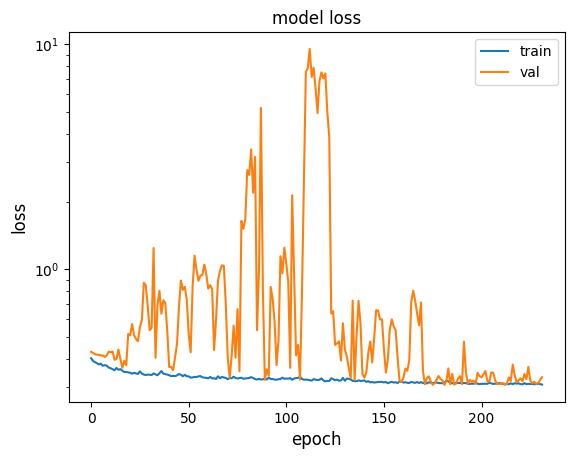

In [16]:
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.yscale('log')
plt.show()
plt.close()

In [17]:
model = make_model(input_shape=X_train.shape[1:], num_classes=num_classes, output_bias=initial_bias)
model.load_weights("CNN_best_weights.h5")
y_test_pred = model.predict(X_test)
y_test_pred[y_test_pred>0.5] = 1
y_test_pred[y_test_pred<0.5] = 0
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
# test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test F1 Macro", test_f1_macro)

57/57 [==============================] - 1s 6ms/step
Test F1 Macro 0.6446473054878155
